In [21]:
!pip install yfinance tensorflow scikit-learn matplotlib

In [22]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [23]:
ticker = "NVDA"   
df = yf.download(ticker, start="2015-01-01")

data = df[["Close"]]
data.head()

C:\Users\16786\AppData\Local\Temp\ipykernel_5568\3491129396.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2015-01-01")
[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,NVDA
Date,
2015-01-02,0.483011
2015-01-05,0.474853
2015-01-06,0.460457
2015-01-07,0.459257
2015-01-08,0.476533


In [24]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [25]:
window = 60

X, y = [], []

for i in range(window, len(scaled_data)):
    X.append(scaled_data[i-window:i])
    y.append(scaled_data[i])

X = np.array(X)
y = np.array(y)

print(X.shape, y.shape)

(2745, 60, 1) (2745, 1)


In [26]:
split = int(len(X)*0.8)

X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [27]:
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X.shape[1],1)),
    Dropout(0.2),

    LSTM(64),
    Dropout(0.2),

    Dense(1)
])

model.compile(
    optimizer="adam",
    loss="mean_squared_error"
)

model.summary()

E:\CP140X\cp2403_info_process\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 60, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,985 (195.25 KB)

 Trainable params: 49,985 (195.25 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=32,
    validation_data=(X_test,y_test)
)

Epoch 1/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 12s 84ms/step - loss: 4.5502e-04 - val_loss: 0.0014
Epoch 2/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - loss: 8.8679e-05 - val_loss: 0.0029
Epoch 3/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - loss: 8.3776e-05 - val_loss: 0.0013
Epoch 4/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - loss: 8.9645e-05 - val_loss: 0.0013
Epoch 5/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - loss: 6.1819e-05 - val_loss: 0.0025
Epoch 6/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 10s 76ms/step - loss: 6.4705e-05 - val_loss: 0.0022
Epoch 7/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - loss: 6.1518e-05 - val_loss: 0.0019
Epoch 8/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 11s 79ms/step - loss: 5.7880e-05 - val_loss: 0.0026
Epoch 9/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - loss: 6.2689e-05 - val_loss: 0.0050
Epoch 10/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - loss: 5.0663e-05 - val_loss: 0.0012
Epoch 11/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 11s 78ms/step - loss: 4.8188e-05 - val_loss: 0.0014
Epoch 12/1

In [29]:
pred = model.predict(X_test)

pred_prices = scaler.inverse_transform(pred)
real_prices = scaler.inverse_transform(y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step 


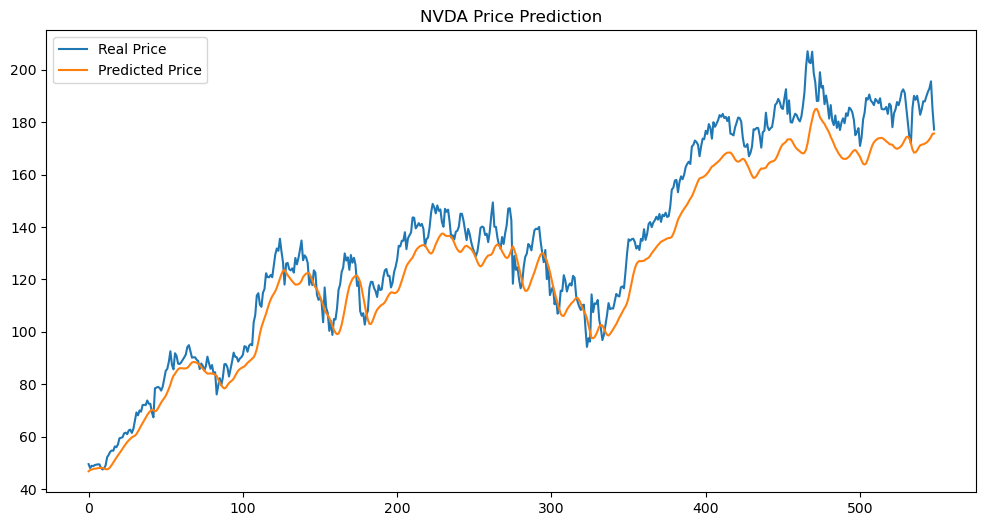

In [30]:
plt.figure(figsize=(12,6))

plt.plot(real_prices, label="Real Price")
plt.plot(pred_prices, label="Predicted Price")

plt.title(f"{ticker} Price Prediction")
plt.legend()
plt.show()

In [31]:
last_60 = scaled_data[-60:]
last_60 = np.reshape(last_60,(1,60,1))

next_day = model.predict(last_60)
next_day_price = scaler.inverse_transform(next_day)

print("Predicted next close price:", next_day_price[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Predicted next close price: 174.40813
